# Ph 21 Assignment 5

## 1

For this project we will be referencing "A Tutorial on Principal Component Analysis" by Jonathon Shlens

## 2

Now we will write some code to compute the principle components of a general set of measurements 

In [6]:
import numpy as np
from numpy import linalg as LA 

In [ ]:
def PCA(Data):
    Mean = np.mean(Data.T,axis=1)
    Center = (Data-Mean).T 
    [Varience,Vectors] = LA.eig(np.cov(Center)) 
    Projected = np.dot(Vectors.T,Center) 
    return Vectors,Projected,Varience

## 3

Now let's test this code on a simple dataset where $x_i$ is linearly dependent on $y_i$. Let's say $y_i = x_i +5$

In [206]:
def twoDtestdata(n,r1,r2,er):
    xs = []
    ys = []
    for i in range(0,n):
        x = np.random.uniform(r1,r2)
        xer = np.random.uniform(-er,er)
        y = x + 5
        yer = np.random.uniform(-er,er)
        xs.append(x+xer)
        ys.append(y+yer)
    td = [xs,ys]
    return(np.array(td))

tdtd = twoDtestdata(50,0,20,2)

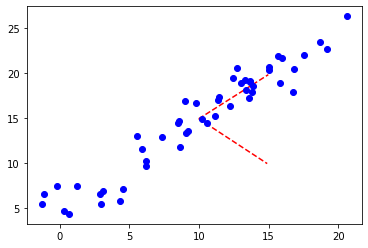

In [234]:
A = tdtd

vec,proj,var = PCA(A.T)

plt.figure()
M = np.mean(A,axis=1)
plt.plot([0, -vec[0,0]*7]+M[0], [0, -vec[0,1]*7]+M[1],'--r')
plt.plot([0, vec[1,0]*7]+M[0], [0, vec[1,1]*7]+M[1],'--r')
plt.plot(A[0,:],A[1,:],'ob')
plt.show()

## 4

Now let's consider a three camera problem.

In [227]:
def threecamtestdata(n,r1,r2,er):
    tds = []
    for j in ((1,5),(-3,50),(3,-20)):
        xs = []
        ys = []
        m,b = j
        for i in range(0,n):
            x = np.random.uniform(r1,r2)
            xer = np.random.uniform(-er,er)
            y = m*x + b
            yer = np.random.uniform(-er,er)
            xs.append(x+xer)
            ys.append(y+yer)
        tds.append(xs)
        tds.append(ys)
    return(np.array(tds))

tctd = threecamtestdata(50,0,20,2)

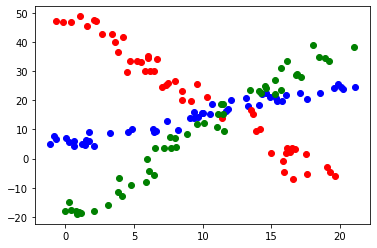

In [210]:
C = tctd
plt.figure()
plt.plot(C[0,:],C[1,:],'ob')
plt.plot(C[2,:],C[3,:],'or')
plt.plot(C[4,:],C[5,:],'og')
plt.show()

In [232]:
PCA(tctd.T)

(array([[-0.12088417, -0.09249426,  0.69044853, -0.59071107, -0.34564473,
         -0.1780528 ],
        [-0.11203099, -0.10798195,  0.68977409,  0.57961062,  0.35399485,
          0.19682436],
        [ 0.19426047,  0.24544277,  0.05635708, -0.14697811, -0.23667649,
          0.90621536],
        [-0.55280179, -0.74249925, -0.20523794, -0.05639895, -0.07762103,
          0.30294646],
        [-0.23236386,  0.18623537, -0.02279913, -0.51172097,  0.79571814,
          0.12561018],
        [-0.75862782,  0.57754117, -0.04091443,  0.16873114, -0.2449678 ,
         -0.02786802]]),
 array([[ 6.31657896e+00,  1.26745731e+01,  1.03865237e+01,
          5.79177154e+00, -3.38286915e+00,  3.99790020e+00,
          1.38850705e+01, -2.46804991e+01, -4.16969683e+00,
         -1.44971364e+01,  1.19831676e+01, -2.83295096e+01,
          1.97292467e+00,  1.24354857e+01,  2.35221585e+01,
          2.51798826e+01, -5.01937788e+00,  1.27208138e+00,
         -2.48190776e+01,  2.44064795e+01,  2.87613261e+